In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-wyq9nufb
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-wyq9nufb


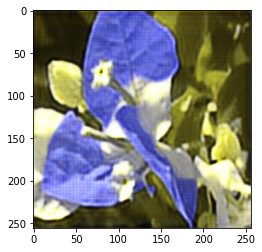

In [ ]:
# example of using saved cyclegan models for image translation
from numpy import expand_dims
from keras.models import load_model
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.preprocessing.image import img_to_array , array_to_img
from keras.preprocessing.image import load_img
from matplotlib import pyplot
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image

# load an image to the preferred size
def load_image(filename, size=(256,256)):
# load and resize the image
  pixels = load_img(filename, target_size=size)
# convert to numpy array
  pixels = img_to_array(pixels)
# transform in a sample
  pixels = expand_dims(pixels, 0)
# scale from [0,255] to [-1,1]
  pixels = (pixels - 127.5) / 127.5
  return pixels
# load the image
image_src = load_image('/content/drive/MyDrive/Internship/Infosys Internship/Image_data_to_send/Real_Images/(998).jpg')
# load the model
cust = {'InstanceNormalization': InstanceNormalization}
model_AtoB = load_model('/content/drive/MyDrive/Internship/Infosys Internship/GAN output/Model/GAN Model/g_model_AtoB_001000.h5', cust , compile = False)
# translate image
image_tar = model_AtoB.predict(image_src)
# scale from [-1,1] to [0,1]
image_tar = (image_tar + 1) / 2.0
# plot the translated image
pyplot.imshow(image_tar[0])
pyplot.show()


